## Objetivos dessa aula


Nessa aula aprenderemos mais sobre o banco de dados do ChEBML e como extrair suas informações. Especificamente dados de estrutura e atividade de moléculas testadas em um alvo de intresse. Esse conjunto de dados será usado posteriormente em diversas atividades, como busca por similaridade, aprendizado de máquina e docking.

### Conteúdos práticos
    
**Objetivo: Obter uma lista de compostos com dados de bioatividade para um determinado alvo macromolecular**

* Utilizando o website do ChEMBL
* Obter dados do composto
    * Preprocessamento e filtragem
* Output dos dados de bioatividade-composto
    * Merge bioactivity and compound data, and add pIC50 values
    * Draw molecules with highest pIC50
    * Write output file

### Referências

* ChEMBL bioactivity database: [Gaulton *et al.*, <i>Nucleic Acids Res.</i> (2017), 45(Database issue), D945–D954](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5210557/)
* The EBI RDF platform: [Jupp *et al.*, <i>Bioinformatics </i> (2014), 30(9), 1338-9](https://www.ncbi.nlm.nih.gov/pubmed/24413672)
* Info on half maximal inhibitory concentration: [pIC50](https://en.wikipedia.org/wiki/IC50)
* [UniProt website](https://www.uniprot.org/)

## Teoria

### ChEMBL database
>"ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs." ([ChEMBL website](https://www.ebi.ac.uk/chembl/))

* Conjunto de dados de biotividade em larga escala com open-acess
* **Conjunto atual de dados (em 09.2020, ChEMBL 27):**
    * \>1.9 milhões de compostos distindos
    * \>16 milhões de valores de atividades
    * Ensaios em ~13,000 alvos
* A **origem dos dados** incluí literatura científica, ensaios do PubChem, DNDi, BindingDB...
* ChEMBL data can be accessed via a [web-interface](https://www.ebi.ac.uk/chembl/), the [EBI-RDF platform](https://www.ncbi.nlm.nih.gov/pubmed/24413672) and the [ChEMBL web rescource client](https://github.com/chembl/chembl_webresource_client)

## Practical

In the following, we want to download all molecules that have been tested against our target of interest, the **epidermal growth factor receptor** ([**EGFR**](https://www.uniprot.org/uniprot/P00533)) kinase.

### Montando o gdrive e importando bibliotecas importantes

Nessa etapa será necessário associar o seu google drive ao seu notebook do colab. Para tanto rode a célula abaixo e quando solicitado realize o login no Google Drive utilizando seu e-mail USP, caso contrário você não conseguirá acessar os arquivos disponíveis na pasta compartilhada "cheminformatics":

https://drive.google.com/drive/folders/1U7g-vXBwnzpBiVl3uCnk6rjVVUX72py_?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

### Obter os dados relacionados ao alvo (EGFR kinase)

* Uniprot ID: EGFR kinase:  [P00533](http://www.uniprot.org/uniprot/P00533))
* Use o UniProt ID para obter informações sobre o alvo no site do [ChEMBL](https://www.ebi.ac.uk/chembl/)

Buscar pelo Type **SINGLE PROTEIN** do organismo *Homo sapiens*

Filtrar os resultados:

Standard Type = **"IC50"**, Standard Relation = **"="**, Assay Data Type Label = **"B"**, Standard Value = **"nM"**

In [ ]:
#Carregar o arquivo baixado no ChEMBL
df = pd.read_csv('/content/drive/MyDrive/cheminformatics/DATA/activity_data_EGFR.csv', delimiter=';')

In [ ]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [ ]:
#Ver as 5 primeiras linhas do dataframe e conferir se os dados estão corretos.
df.head(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL288441,BOSUTINIB,4.0,530.46,2,5.19,SKI-606,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1240341,1,Scientific Literature,Leukemia,2009.0,None,NaN,NaN
1,CHEMBL271410,NaN,None,378.48,0,3.21,"126, page S27 table 1",Cc1cccc(Nc2ncnc3ccncc23)c1NCCCN1CCOCC1,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1143196,1,Scientific Literature,J Med Chem,2008.0,None,NaN,NaN
2,CHEMBL411243,NaN,None,429.37,0,4.67,"109, page S26 table 1",CN(C)CCCCCNc1c(Br)cccc1Nc1ncnc2ccncc12,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1143196,1,Scientific Literature,J Med Chem,2008.0,None,NaN,NaN
3,CHEMBL270713,NaN,None,387.29,0,3.50,"106, page S26 table 1",CN(C)CCNc1c(Br)cccc1Nc1ncnc2ccncc12,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1143196,1,Scientific Literature,J Med Chem,2008.0,None,NaN,NaN
4,CHEMBL54475,NaN,None,301.15,0,3.53,"78, page S25 table 1",Brc1cccc(Nc2ncnc3ncccc23)c1,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1143196,1,Scientific Literature,J Med Chem,2008.0,None,NaN,NaN


In [ ]:
#Vamos manter apenas as colunas que possuem relevância para as próximas etapas do nosso trabalho.

colunas = ['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'Target Name', 'Target Organism']

#Criando um novo dataframe apenas com as informações relevantes

bioactivities_df = df[colunas]

In [ ]:
#Checando

bioactivities_df.head(5)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Target Name,Target Organism
0,CHEMBL288441,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,IC50,'=',491.000,nM,Epidermal growth factor receptor erbB1,Homo sapiens
1,CHEMBL271410,Cc1cccc(Nc2ncnc3ccncc23)c1NCCCN1CCOCC1,IC50,'=',9.333,nM,Epidermal growth factor receptor erbB1,Homo sapiens
2,CHEMBL411243,CN(C)CCCCCNc1c(Br)cccc1Nc1ncnc2ccncc12,IC50,'=',8.511,nM,Epidermal growth factor receptor erbB1,Homo sapiens
3,CHEMBL270713,CN(C)CCNc1c(Br)cccc1Nc1ncnc2ccncc12,IC50,'=',45.710,nM,Epidermal growth factor receptor erbB1,Homo sapiens
4,CHEMBL54475,Brc1cccc(Nc2ncnc3ncccc23)c1,IC50,'=',691.830,nM,Epidermal growth factor receptor erbB1,Homo sapiens


In [ ]:
#Verificando as dimensões do dataframe atual

print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10924, 8)


### Preprocessamento e filtragem inicial dos dados.

1. Deletar linhas faltando valores
2. Deletar moléculas duplicadas
3. Resetar o index do `DataFrame`

**1. Deletar linhas faltando valores**

Usar o parâmetro `inplace=True` para remover valores diretamente do `DataFrame` atual.

In [ ]:
bioactivities_df = bioactivities_df.dropna(axis=0, how="any")

print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10916, 8)


**2. Deletar moléculas duplicadas**

Em alguns casos uma mesma moléculas (`Molecule ChEMBL ID`) foi testada mais de uma vez, nestes casos mantemos a primeira ocorrência.

In [ ]:
bioactivities_df.drop_duplicates("Molecule ChEMBL ID", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (7060, 8)


**3. Resetar o index do "DataFrame"**

Como algumas linhas foram deletadas, precisamos resetar os índice para atualizar a numeraçã oe ele se manter continuo (Isso é importante para que não ocorram erros nas próximas etapas do processamento).

In [ ]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (7060, 8)


Agora temos **7060** moleculas com respectivos valores de IC50 para a nossa kinase alvo.

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6454, 2)


Sanity check: Remove all molecules without a canonical SMILES string.

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6454, 2)


In [ ]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1
5,CHEMBL77085,96000.0,nM,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-]
6,CHEMBL443268,5310.0,nM,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...
7,CHEMBL76979,264000.0,nM,COc1cc(/C=C(\C#N)C(=O)O)cc(OC)c1O
8,CHEMBL76589,125.0,nM,N#CC(C#N)=C(N)/C(C#N)=C/c1ccc(O)cc1
9,CHEMBL76904,35000.0,nM,N#CC(C#N)=Cc1ccc(O)c(O)c1


#### Add pIC50 values

As you can see the low IC50 values are difficult to read (values are distributed over multiple scales), which is why we convert the IC50 values to pIC50.

In [ ]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [ ]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879


#### Draw compound data

Let's have a look at our collected data set.

First, we plot the pIC50 value distribution

array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

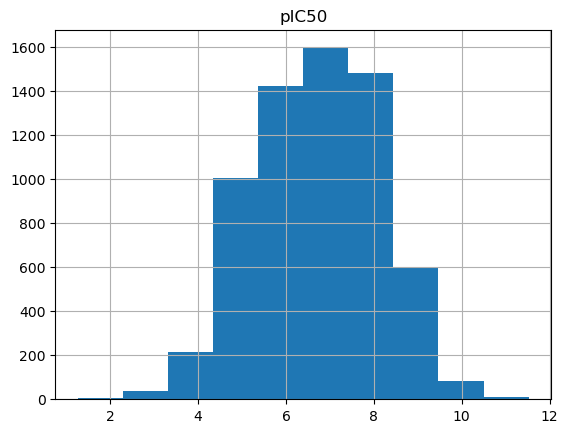

In [ ]:
output_df.hist(column="pIC50")

In the next steps, we add a column for RDKit molecule objects to our `DataFrame` and look at the structures of the molecules with the highest pIC50 values.

In [ ]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [ ]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

Show the three most active molecules, i.e. molecules with the highest pIC50 values.

In [ ]:
output_df.drop("smiles", axis=1).head(3)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL63786,0.003,nM,11.522879,<rdkit.Chem.rdchem.Mol object at 0x7f041e269430>
1,CHEMBL53711,0.006,nM,11.221849,<rdkit.Chem.rdchem.Mol object at 0x7f041e260ac0>
2,CHEMBL35820,0.006,nM,11.221849,<rdkit.Chem.rdchem.Mol object at 0x7f041e253ac0>


In [ ]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (6454, 5)


In [ ]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (5568, 5)


#### Write output data to file

We want to use this bioactivity-compound dataset in the following talktorials, thus we save the data as `csv` file.
Note that it is advisable to drop the molecule column (which only contains an image of the molecules) when saving the data.

In [ ]:
output_df.to_csv(DATA / "EGFR_compounds.csv")
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910


In [ ]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (5568, 5)


## Discussion

In this tutorial, we collected bioactivity data for our target of interest from the ChEMBL database.
We filtered the data set in order to only contain molecules with measured IC50 bioactivity values.

Be aware that ChEMBL data originates from various sources. Compound data has been generated in different labs by different people all over the world. Therefore, we have to be cautious with the predictions we make using this data set. It is always important to consider the source of the data and consistency of data production assays when interpreting the results and determining how much confidence we have in our predictions.

In the next tutorials, we will filter our acquired data by Lipinski's rule of five and by unwanted substructures. Another important step would be to *clean* the molecular data. As this is not shown in any of our talktorials (yet), we would like to refer to the [Standardiser library](https://github.com/flatkinson/standardiser) or [MolVS](https://molvs.readthedocs.io/en/latest/) as useful tools for this task.